In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
# Importe Data 
from sklearn.datasets import load_boston 
boston = load_boston() 

In [3]:
boston.data.shape

(506, 13)

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [6]:
#price or the target variable
price =boston.target

In [7]:
#load into a dataframe

df = pd.DataFrame(boston.data)
price =pd.DataFrame(boston.target)

In [8]:
#set the column names
df.columns = boston.feature_names

In [9]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [10]:
df.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1    

In [11]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
#Observe the data types
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [13]:
#check for null/missing values
df.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 <a list of 13 Text major ticklabel objects>)

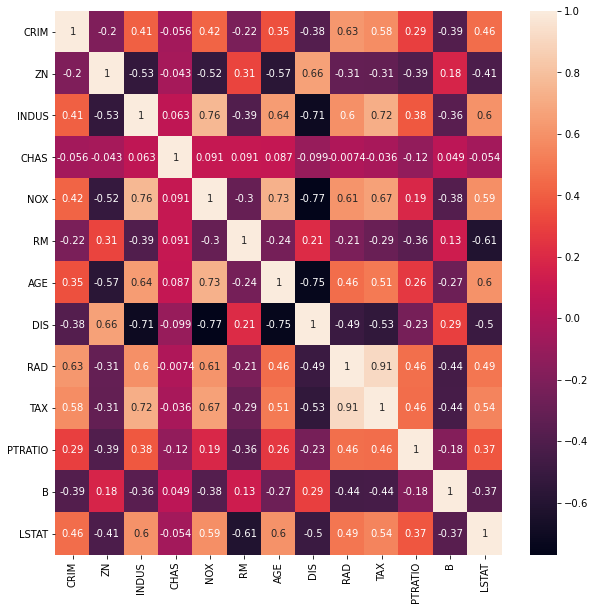

In [14]:
correlations =df.corr()

plt.figure(figsize = (10,10))
sns.heatmap(data = correlations,annot=True)

plt.yticks(rotation=0)
plt.xticks(rotation=90)

#Observe and analyze the corrleations
#Check for multi multicolinearity
#In this example , we will proceed keeping all the features

In [15]:
#Separate the features and the target variables
X = df
y = price

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [17]:
X_train.shape

(404, 13)

In [18]:
X_test.shape

(102, 13)

In [19]:
Y_train.shape

(404, 1)

In [20]:
Y_test.shape

(102, 1)

In [21]:
lm =LinearRegression()

In [22]:
lm.fit(X_train, Y_train)

LinearRegression()

In [23]:
#predict the train values and calculate rmse & rsquare
y_train_predict = lm.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = round(lm.score(X_train, Y_train),2)

#Performance metrics for the train data

In [24]:
rmse

4.741000992236516

In [25]:
r2

0.74

#predict for test values 

In [26]:
y_test_predict = lm.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = round(lm.score(X_test, Y_test),2)

In [27]:
rmse

4.568292042303187

In [28]:
r2

0.73

In [29]:
y_test_predict

array([[37.56311787],
       [32.14445143],
       [27.06573629],
       [ 5.67080633],
       [35.09982577],
       [ 5.85803701],
       [27.53708506],
       [31.81019188],
       [26.35634771],
       [22.77208748],
       [31.91183048],
       [21.50224061],
       [23.70119983],
       [33.3622504 ],
       [28.51633591],
       [14.39456899],
       [ 0.19284025],
       [18.66247155],
       [13.71004139],
       [14.13408635],
       [ 2.03263952],
       [19.7280831 ],
       [38.18657429],
       [24.19760058],
       [31.30247973],
       [11.14144544],
       [25.03636951],
       [23.27970871],
       [22.49420127],
       [20.52972594],
       [15.16513744],
       [ 6.92553586],
       [18.3557733 ],
       [22.37179804],
       [28.91287973],
       [19.02980786],
       [30.19357214],
       [ 8.74384915],
       [40.86691522],
       [34.53763591],
       [20.70224878],
       [ 2.59618963],
       [29.99590282],
       [12.15704798],
       [27.10186397],
       [30